In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
wine_fileName = "wine.csv"
wine_col_names = ['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
            'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity',
            'Hue','OD280/OD315 of diluted wines','Proline']
classes = ['Class1','Class2','Class3']

In [3]:
wine_dataset = pd.read_csv(wine_fileName,header=None, names = wine_col_names)
X = wine_dataset.iloc[:,1:].values
y = wine_dataset.iloc[:,0:1].values.flatten()

#wine_col_names will be treated as feature list. So target variable name will be removed now.
wine_col_names.remove('Class')

In [4]:
wine_dataset.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
# Dataset looks clean. No missing values. No outliers. Lets plot LDA and PCA with 2 components 
# and see how overlapping the classes are.

In [6]:
#Normalize data.
scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)

/Users/ass6ash/anaconda/lib/python3.6/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


explained variance ratio (first two components): [ 0.40749485  0.18970352]


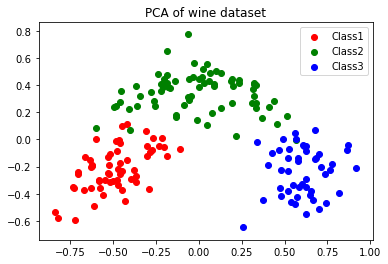

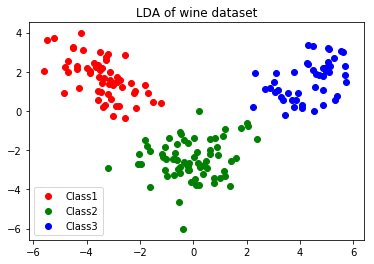

In [7]:
from sklearn.decomposition import PCA
from sklearn.lda import LDA

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
for c, i, target_name in zip("rgb", [1, 2, 3], classes):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of wine dataset')

plt.figure()
for c, i, target_name in zip("rgb", [1, 2, 3], classes):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of wine dataset')

plt.show()

In [8]:
#Clear distinction between classes. Classification should have good results

Optimal number of features : 11


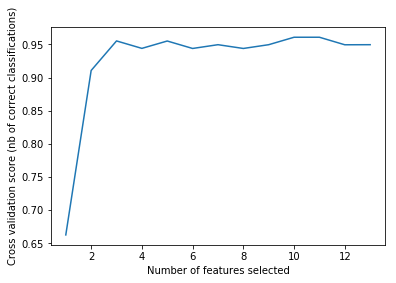

In [9]:
#Feature selection
#Recursive feature elimination with Cross validation

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [10]:
#Lets see the 11 best features according to RFE
ranks = rfecv.ranking_

rfe_selected_features = [feature for feature,rank in zip(wine_col_names,ranks) if rank == 1]
rfe_discarded_features = [feature for feature,rank in zip(wine_col_names,ranks) if rank != 1]

print("Features selected by RFECV are\n")
print(rfe_selected_features)
print("\nFeatures discarded by RFECV are\n")
print(rfe_discarded_features)

Features selected by RFECV are

['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Total phenols', 'Flavanoids', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

Features discarded by RFECV are

['Magnesium', 'Nonflavanoid phenols']


In [11]:
#Lets see thr 11 best features according to SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selectkbest = SelectKBest(chi2, k=11)
X_new = selectkbest.fit_transform(X, y)

kbest_selected_features = [feature for feature,selection in 
                           zip(wine_col_names,selectkbest.get_support()) if selection == True]
kbest_discarded_features = [feature for feature,selection in 
                           zip(wine_col_names,selectkbest.get_support()) if selection == False]

print("Features selected by selectKBest are\n")
print(kbest_selected_features)
print("\nFeatures discarded by selectKBest are\n")
print(kbest_discarded_features)

#Lets see the scores to get a better picture
print("\nScores for the features are:")
for feature,score in zip(wine_col_names,selectkbest.scores_):
    print('%25s  \t - \t %f' % (feature,score) )

Features selected by selectKBest are

['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

Features discarded by selectKBest are

['Ash', 'Magnesium']

Scores for the features are:
                  Alcohol  	 - 	 9.454001
               Malic acid  	 - 	 8.118583
                      Ash  	 - 	 0.934670
        Alcalinity of ash  	 - 	 3.319582
                Magnesium  	 - 	 1.641313
            Total phenols  	 - 	 9.401770
               Flavanoids  	 - 	 16.050977
     Nonflavanoid phenols  	 - 	 5.346082
          Proanthocyanins  	 - 	 3.981352
          Color intensity  	 - 	 12.453157
                      Hue  	 - 	 8.449402
OD280/OD315 of diluted wines  	 - 	 16.677678
                  Proline  	 - 	 18.792035


In [12]:
#Chi2 values paint a slightly different picture compared to RFECV
#I will decide to go with features selected by selectKBest.
#Different classifiers will be trained in the next notebook